In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load modules 

In [2]:
import os
path = os.listdir(r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training')
classes = {'notumor':0, 'pituitary':1}

In [6]:
import os
import cv2

X = []
Y = []

classes = {'notumor': 0, 'pituitary': 1}

for cls in classes:
    folder_path = os.path.join(r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training', cls)
    for img_namXe in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:  # Check if the image is read properly
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])


In [7]:
np.unique(Y)

array([0, 1])

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
X.shape

(3052, 200, 200, 3)

In [11]:
pd.Series(Y).value_counts()

0    1595
1    1457
Name: count, dtype: int64

# visualize data


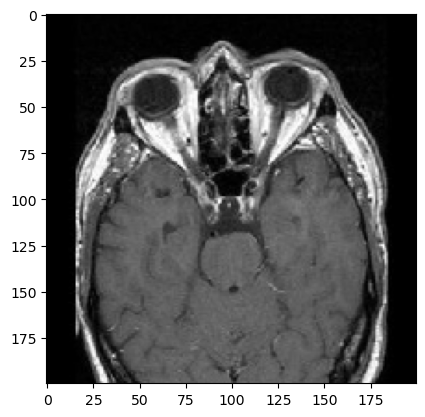

In [12]:
plt.imshow(X[0],cmap='gray')

# prepared data

In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to training data
data_path = r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training'
classes = {'notumor': 0, 'pituitary': 1}

data = []
labels = []

# Loop through each folder (class)
for label in classes:
    folder_path = os.path.join(data_path, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # Resize all images to same size
            data.append(img)
            labels.append(classes[label])
        except:
            pass  # skip corrupt images

# Convert to NumPy arrays
X = np.array(data)
Y = np.array(labels)

# Normalize image data (optional but recommended)
X = X / 255.0

# Reshape if needed (e.g., flatten images)
X_updated = X.reshape(len(X), -1)

# Split data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, test_size=0.2, random_state=10)

# Print shapes to confirm
print("Train shape:", xtrain.shape, ytrain.shape)
print("Test shape:", xtest.shape, ytest.shape)


Train shape: (2441, 12288) (2441,)
Test shape: (611, 12288) (611,)


# Split data

In [15]:
import os
import cv2
import numpy as np

# Define class labels
classes = {'notumor': 0, 'pituitary': 1}

# Data containers
X = []
Y = []

# Path to the training folder
base_path = r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training'

# Iterate over each class
for cls in classes:
    folder_path = os.path.join(base_path, cls)
    
    # Iterate through all image files in the class folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            img = cv2.resize(img, (200, 200))  # Resize to 200x200
            X.append(img)
            Y.append(classes[cls])

# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Normalize the pixel values (optional but recommended)
X = X / 255.0

print(f"Data loaded: {X.shape[0]} images.")
print(f"Image shape: {X.shape[1:]} (Height x Width x Channels)")
print(f"Labels shape: {Y.shape}")


Data loaded: 3052 images.
Image shape: (200, 200, 3) (Height x Width x Channels)
Labels shape: (3052,)


# feature scaling

In [6]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0


# Model Training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
lg = LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)


LogisticRegression(C=0.1)

# Evaluation


In [13]:
print("Training Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))

Training Score: 0.522326915198689
Testing Score: 0.5237315875613748


In [17]:
print("Training Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Training Score: 0.9934453092994674
Testing Score: 0.9819967266775778


# Prediction

In [16]:
pred = sv.predict(xtest)

In [18]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 70,  83,  99, 147, 247, 259, 262, 284, 333, 485, 550], dtype=int64),)

In [19]:
print("Total Misclassified Samples:",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples: 11
0 0


# detection

Found images: ['Tr-piTr_0000.jpg', 'Tr-piTr_0001.jpg', 'Tr-piTr_0002.jpg', 'Tr-piTr_0003.jpg', 'Tr-piTr_0004.jpg', 'Tr-piTr_0005.jpg', 'Tr-piTr_0006.jpg', 'Tr-piTr_0007.jpg', 'Tr-piTr_0008.jpg', 'Tr-piTr_0009.jpg', 'Tr-pi_0010.jpg', 'Tr-pi_0011.jpg', 'Tr-pi_0012.jpg', 'Tr-pi_0013.jpg', 'Tr-pi_0014.jpg', 'Tr-pi_0015.jpg', 'Tr-pi_0016.jpg', 'Tr-pi_0017.jpg', 'Tr-pi_0018.jpg', 'Tr-pi_0019.jpg', 'Tr-pi_0020.jpg', 'Tr-pi_0021.jpg', 'Tr-pi_0022.jpg', 'Tr-pi_0023.jpg', 'Tr-pi_0024.jpg', 'Tr-pi_0025.jpg', 'Tr-pi_0026.jpg', 'Tr-pi_0027.jpg', 'Tr-pi_0028.jpg', 'Tr-pi_0029.jpg', 'Tr-pi_0030.jpg', 'Tr-pi_0031.jpg', 'Tr-pi_0032.jpg', 'Tr-pi_0033.jpg', 'Tr-pi_0034.jpg', 'Tr-pi_0035.jpg', 'Tr-pi_0036.jpg', 'Tr-pi_0037.jpg', 'Tr-pi_0038.jpg', 'Tr-pi_0039.jpg', 'Tr-pi_0040.jpg', 'Tr-pi_0041.jpg', 'Tr-pi_0042.jpg', 'Tr-pi_0043.jpg', 'Tr-pi_0044.jpg', 'Tr-pi_0045.jpg', 'Tr-pi_0046.jpg', 'Tr-pi_0047.jpg', 'Tr-pi_0048.jpg', 'Tr-pi_0049.jpg', 'Tr-pi_0050.jpg', 'Tr-pi_0051.jpg', 'Tr-pi_0052.jpg', 'Tr-pi_0053

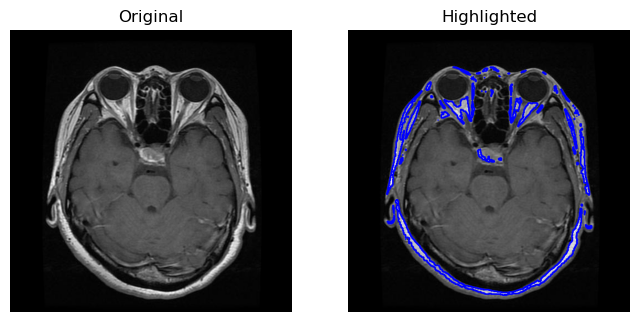

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Folder path — make sure this matches your actual folder name
tumor_folder = r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training\pituitary'

# List images
image_files = [f for f in os.listdir(tumor_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Safety check
print("Found images:", image_files)

# Just do the first image
if image_files:
    filename = image_files[0]
    path = os.path.join(tumor_folder, filename)
    print("Loading:", path)

    img = cv2.imread(path, 0)  # grayscale
    if img is None:
        print("❌ Image could not be loaded.")
    else:
        print("✅ Image loaded. Shape:", img.shape)

        blurred = cv2.GaussianBlur(img, (5, 5), 0)
        _, thresh = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        print(f"Contours found: {len(contours)}")

        output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(output, contours, -1, (0, 0, 255), 2)

        # Plot the results
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(output)
        plt.title("Highlighted")
        plt.axis('off')

        plt.show()
else:
    print("❌ No image files found in folder.")


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Set path and classes
data_path = r'C:\Users\Arunthathi\Desktop\aadhi\project 2\Training'
classes = {'notumor': 0, 'pituitary': 1}

X = []
Y = []

# Load and preprocess images
for cls in classes:
    folder = os.path.join(data_path, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Use grayscale for ML
        if img is not None:
            img = cv2.resize(img, (100, 100))  # Resize to smaller size for speed
            img_flatten = img.flatten()  # Flatten to 1D array
            X.append(img_flatten)
            Y.append(classes[cls])

X = np.array(X)
Y = np.array(Y)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train an SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

# Evaluate
Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Predict on a new image
def predict_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, (100, 100))
        img_flat = img.flatten().reshape(1, -1)
        prediction = model.predict(img_flat)[0]
        label = "Pituitary Tumor" if prediction == 1 else "No Tumor"
        print(f"Prediction: {label}")
        return label
    else:
        print("Failed to load image.")
        return None

# Example usage:
# predict_image(r'C:\path\to\your\test_image.jpg')


Accuracy: 0.9787234042553191
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       319
           1       0.96      0.99      0.98       292

    accuracy                           0.98       611
   macro avg       0.98      0.98      0.98       611
weighted avg       0.98      0.98      0.98       611



# stream.py

In [ ]:
# tumor_detection_app_from_folder.py
import streamlit as st
import os
import random
import numpy as np
import cv2
from PIL import Image

st.set_page_config(page_title="Brain Tumor Auto Detector")
st.title("🧠 Brain Tumor Auto Detection & Severity Estimation")

# Update this to your dataset path
BASE_PATH = r"C:\Users\Arunthathi\Desktop\aadhi\project 2\Training"
CATEGORIES = ["notumor", "pituitary"]
IMG_SIZE = 256

# --- Dummy segmentation logic (replace with your real model) ---
def dummy_segment_tumor(image_np):
    mask = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
    center = (IMG_SIZE // 2, IMG_SIZE // 2)
    radius = IMG_SIZE // 6
    cv2.circle(mask, center, radius, 255, -1)
    return mask

def calculate_tumor_percentage(mask):
    tumor_pixels = np.sum(mask > 0)
    total_pixels = mask.size
    percent = (tumor_pixels / total_pixels) * 100
    return percent

def classify_danger(percent):
    if percent < 2:
        return "Not Dangerous", "🟢"
    elif percent < 8:
        return "Moderately Dangerous", "🟡"
    else:
        return "Highly Dangerous", "🔴"

# --- Function to load one random image ---
def get_random_image():
    selected_class = random.choice(CATEGORIES)
    folder = os.path.join(BASE_PATH, selected_class)
    files = [f for f in os.listdir(folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not files:
        return None, None
    chosen_file = random.choice(files)
    image_path = os.path.join(folder, chosen_file)
    image = Image.open(image_path).convert("RGB")
    return image, selected_class

# --- Process one random MRI from the folders ---
st.subheader("📂 Random MRI Selection from Dataset")

if st.button("🎯 Detect Tumor from Random Image"):
    image, label = get_random_image()
    
    if image is None:
        st.error("No images found in the folders.")
    else:
        image_resized = image.resize((IMG_SIZE, IMG_SIZE))
        image_np = np.array(image_resized)

        st.image(image_np, caption=f"Selected Image ({label})", use_column_width=True)

        # Segment and analyze
        mask = dummy_segment_tumor(image_np)
        tumor_percent = calculate_tumor_percentage(mask)
        severity, icon = classify_danger(tumor_percent)

        st.subheader("🧪 Detection Result")
        st.write(f"**Class Label:** {label}")
        st.write(f"**Affected Area:** {tumor_percent:.2f}%")
        st.write(f"**Severity:** {severity} {icon}")

        # Show overlay
        overlay = image_np.copy()
        overlay[mask > 0] = [255, 0, 0]
        st.image(overlay, caption="Detected Tumor Region", use_column_width=True)
